<a href="https://colab.research.google.com/github/saavedramarcosdavid/Aprendizaje-de-Maquina/blob/main/Trabajo%20final/Trabajo_Final_Aprendizaje_de_m%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left">
<h1> 
<strong>
TRABAJO FINAL <br>
Reconocimiento de Patrones y Aprendizaje de Máquina
</strong><br>
Alumno: Marcos David Saavedra
</h1>
</div>
<div align="right">
<h1>
Tema: <u> Regresión de velocidad del viento</u> <br>
<u> Turbina eólica </u>
</h1>


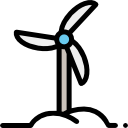
</div>


In [1]:
objetivo = ['TotWindV']
# objetivo = ['WindVxi']
# objetivo = ['WindVyi']
# objetivo = ['WindVzi']
# objetivo = ['WindVxi','WindVyi','WindVzi']
# objetivo = ['OoPDefl1','IPDefl1']
# objetivo = ['OoPDefl1','IPDefl1','WindVxi','WindVyi','WindVzi']

## Carga y análisis del Dataset


### Carga del dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("/content/drive/MyDrive/pruebitas2.csv",delimiter='\t')
df2 = pd.read_csv("/content/drive/MyDrive/pruebita.csv",delimiter=',')
df3 = pd.read_csv("/content/drive/MyDrive/validation.csv",delimiter=',')
df1.head()

FileNotFoundError: ignored

### Acomodando tiempo

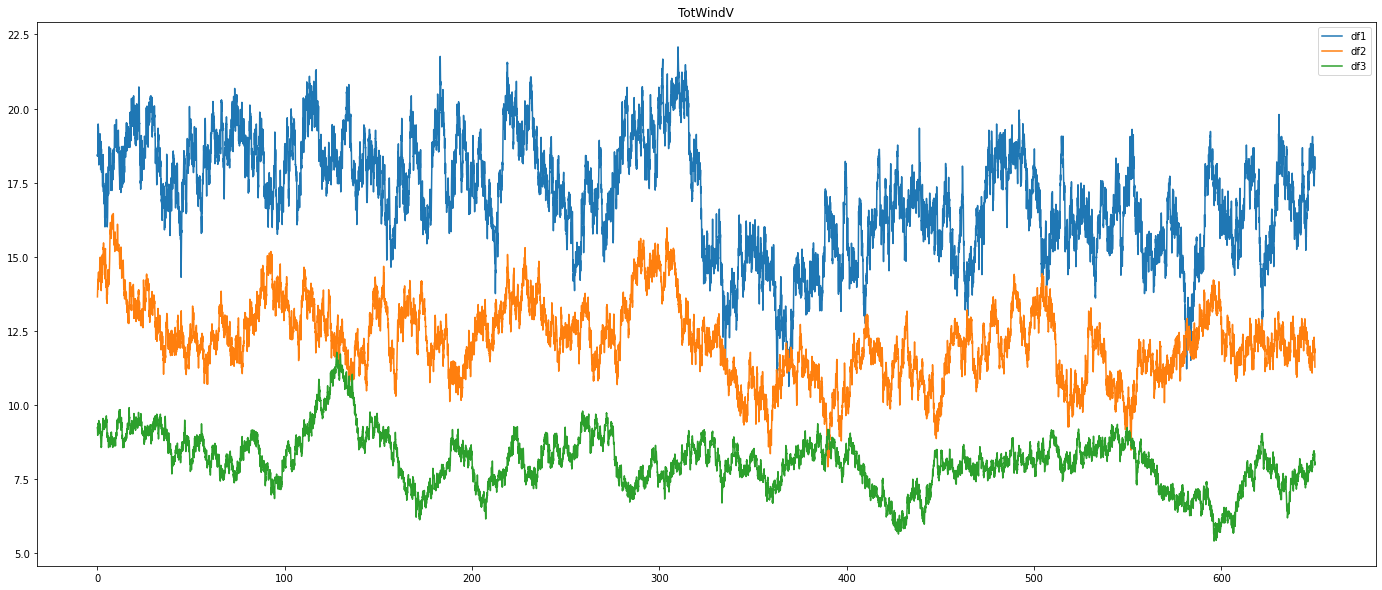

In [ ]:
plt.figure(figsize=(24,10))
plt.plot(df1['Time'],df1['TotWindV'], label='df1')
plt.plot(df2['Time'],df2['TotWindV'], label='df2')
plt.plot(df3['Time'],df3['TotWindV'], label='df3')
plt.legend()
plt.title('TotWindV')
plt.show()

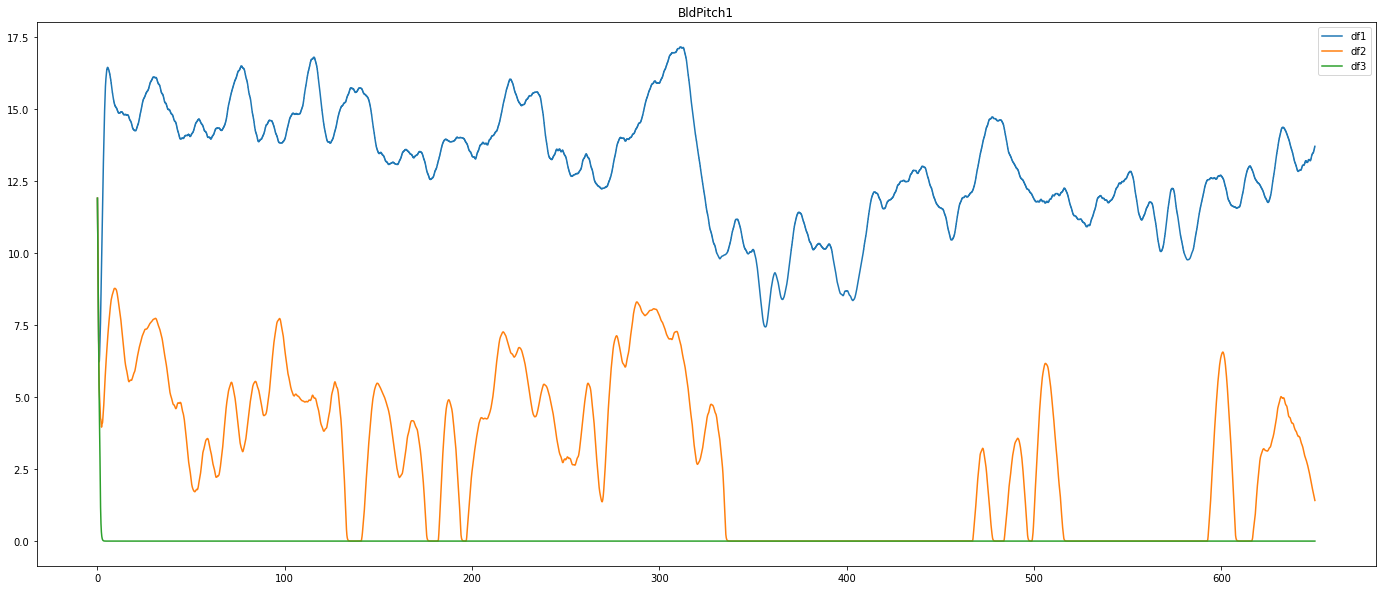

In [ ]:
plt.figure(figsize=(24,10))
plt.plot(df1['Time'], df1['BldPitch1'], label='df1')
plt.plot(df2['Time'], df2['BldPitch1'], label='df2')
plt.plot(df3['Time'], df3['BldPitch1'], label='df3')
plt.legend()
plt.title('BldPitch1')
plt.show()

In [ ]:
maximo = df1.Time.max()
df2.Time = df2.Time + maximo
maximo = df2.Time.max()
df3.Time = df3.Time + maximo

df = pd.concat([df1,df2,df3],axis=0,ignore_index=True,sort=False)

In [ ]:
df = pd.concat([df1,df3],axis=0,ignore_index=True,sort=False)

In [ ]:
df = df3

### Corrimiento de los datos

In [ ]:
corrimiento = 0

if corrimiento:
    a = df[0:-6]
    b = df[6:]
    c = a.drop(objetivo, axis=1)
    c[objetivo] = b[objetivo].values
    df = c
    df

# df = df[(df['Time']>=100)]
# df = df[(df['Time']<=300)]

Como se puede ver `df_info()` deja ver que existe una gran cantidad de datos nulos o faltantes, que deberá ser resuelta para la utilización de los distintos algoritmos.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40036 entries, 0 to 40035
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       40036 non-null  float64
 1   WindVxi    40036 non-null  float64
 2   WindVyi    40036 non-null  float64
 3   WindVzi    40036 non-null  float64
 4   GenPwr     40036 non-null  float64
 5   GenTq      40036 non-null  float64
 6   OoPDefl1   40036 non-null  float64
 7   IPDefl1    40036 non-null  float64
 8   TwstDefl1  40036 non-null  float64
 9   BldPitch1  40036 non-null  float64
 10  PtchPMzc1  40036 non-null  float64
 11  Azimuth    40036 non-null  float64
 12  RotSpeed   40036 non-null  float64
 13  GenSpeed   40036 non-null  float64
 14  TTDspFA    40036 non-null  float64
 15  TTDspSS    40036 non-null  float64
 16  TTDspTwst  40036 non-null  float64
 17  Spn2MLxb1  40036 non-null  float64
 18  Spn2MLyb1  40036 non-null  float64
 19  RootFxc1   40036 non-null  float64
 20  RootFy

Primer filtrado de columnas sin información alguna:

In [ ]:
df.drop(['GenTq','TwstDefl1','TTDspTwst','BldPitch1'],axis=1,inplace=True)

### Analisis del dataset

#### Visualización de las distribuciones de cada una de las variables

In [ ]:
def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    if data.dtype != object:
        sns.histplot(data, alpha=0.4, kde=True, ax=ax)
        sns.rugplot(data, color="black", ax=ax)
        color = "orange"
        text=f"$\\mu$ = {data.mean():.3f}\n"
        text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

        bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
        ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    else:
        data.value_counts(dropna=True).sort_index().plot(kind='barh',ax=ax)
        ax.axes.xaxis.set_ticklabels([])
    ax.set_title(title)
    

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

In [ ]:
df_num =  df.select_dtypes(include =[np.number])
print("Cantidad de atributos:",df_num.columns.shape[0])
print("Atributos:",list(np.array(df_num.columns)))

Cantidad de atributos: 46
Atributos: ['Time', 'WindVxi', 'WindVyi', 'WindVzi', 'GenPwr', 'GenTq', 'OoPDefl1', 'IPDefl1', 'TwstDefl1', 'BldPitch1', 'PtchPMzc1', 'Azimuth', 'RotSpeed', 'GenSpeed', 'TTDspFA', 'TTDspSS', 'TTDspTwst', 'Spn2MLxb1', 'Spn2MLyb1', 'RootFxc1', 'RootFyc1', 'RootFzc1', 'RootMxc1', 'RootMyc1', 'RootMzc1', 'RotTorq', 'LSSGagMya', 'LSSGagMza', 'YawBrFxp', 'YawBrFyp', 'YawBrFzp', 'YawBrMxp', 'YawBrMyp', 'YawBrMzp', 'TwrBsFxt', 'TwrBsFyt', 'TwrBsFzt', 'TwrBsMxt', 'TwrBsMyt', 'TwrBsMzt', 'HSShftTq', 'TipSpdRat', 'LSSGagVxa', 'LSShftTq', 'TotWindV', 'HorWindV']


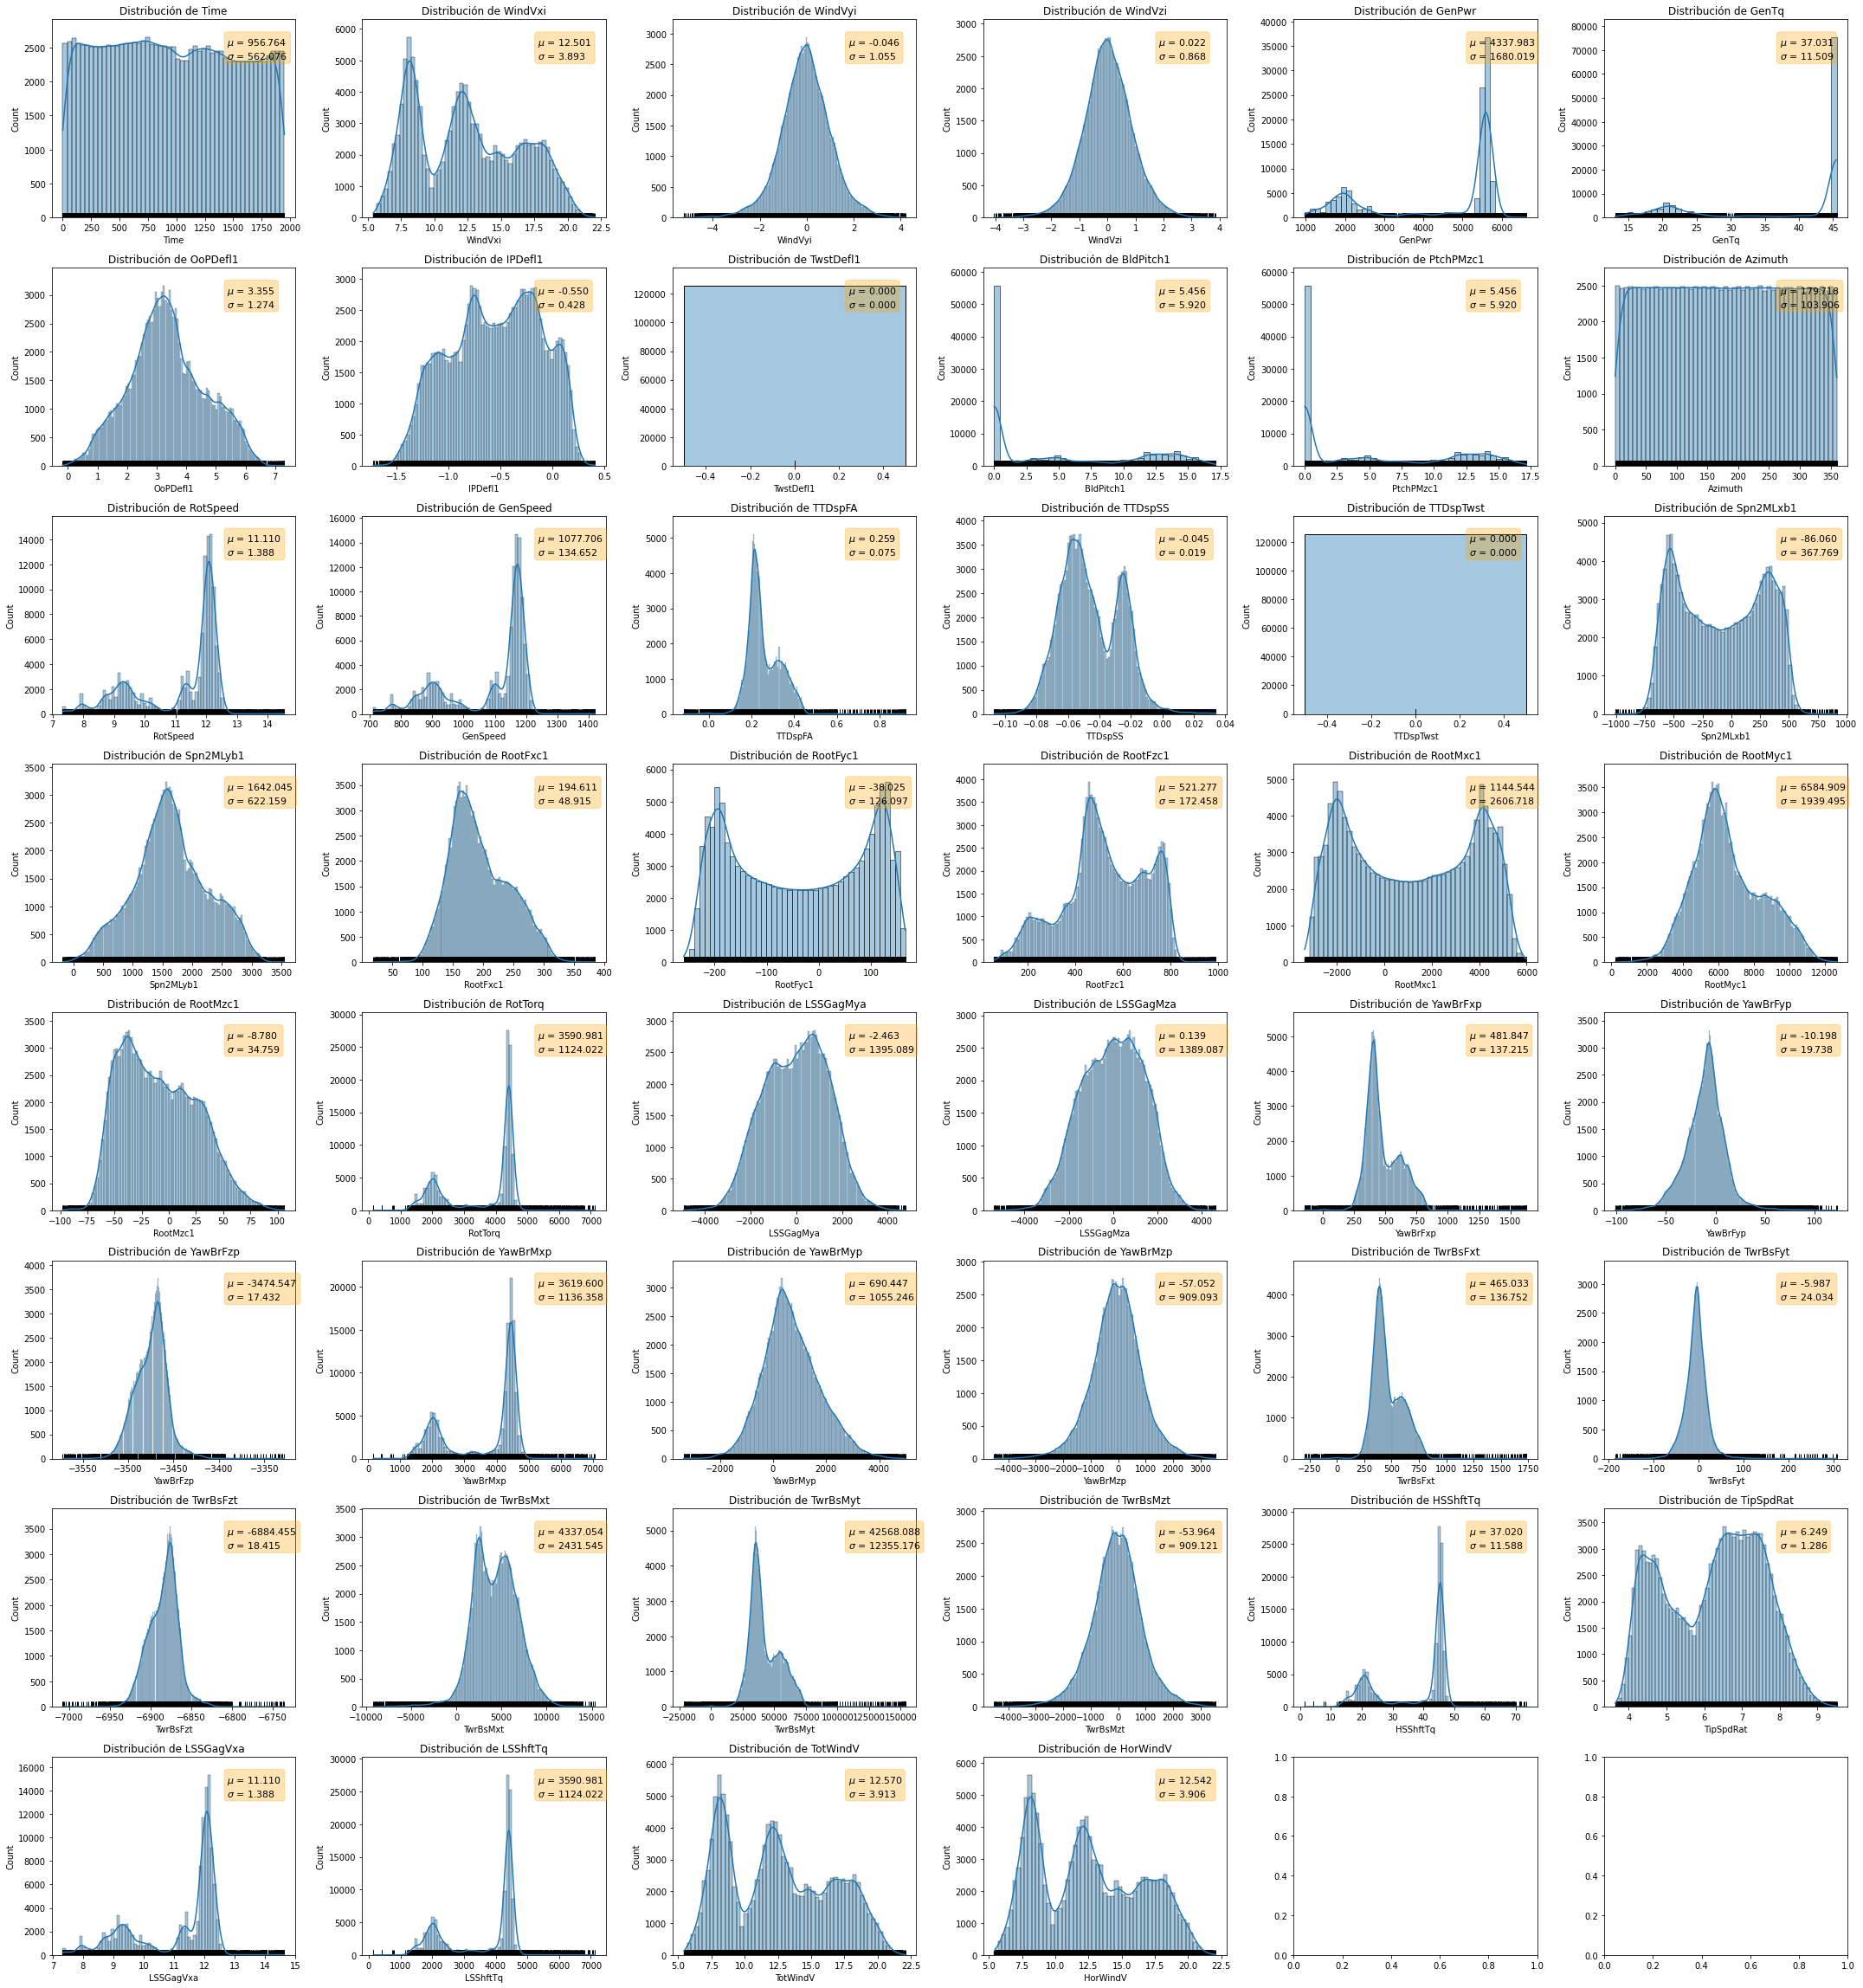

In [ ]:
print_dataset(df_num, 8, 6)

#### Matriz de correlacion

Se puede ver que la correlación de Pearson para *TotWindV* vs las demás variables, no es muy elevada

In [ ]:
def matriz_correlacion(df,metodo, objetivo):
    corr_df = df.corr(method=metodo)

    # plt.figure(figsize=(25, 22))
    plt.figure(figsize=(df.shape[1]*0.6, df.shape[1]*0.52))
    sns.heatmap(round(corr_df,2), annot=True, cmap="Purples")
    plt.show()
    target_corr = corr_df[objetivo]
    return pd.DataFrame(target_corr).sort_values(objetivo, ascending=False)

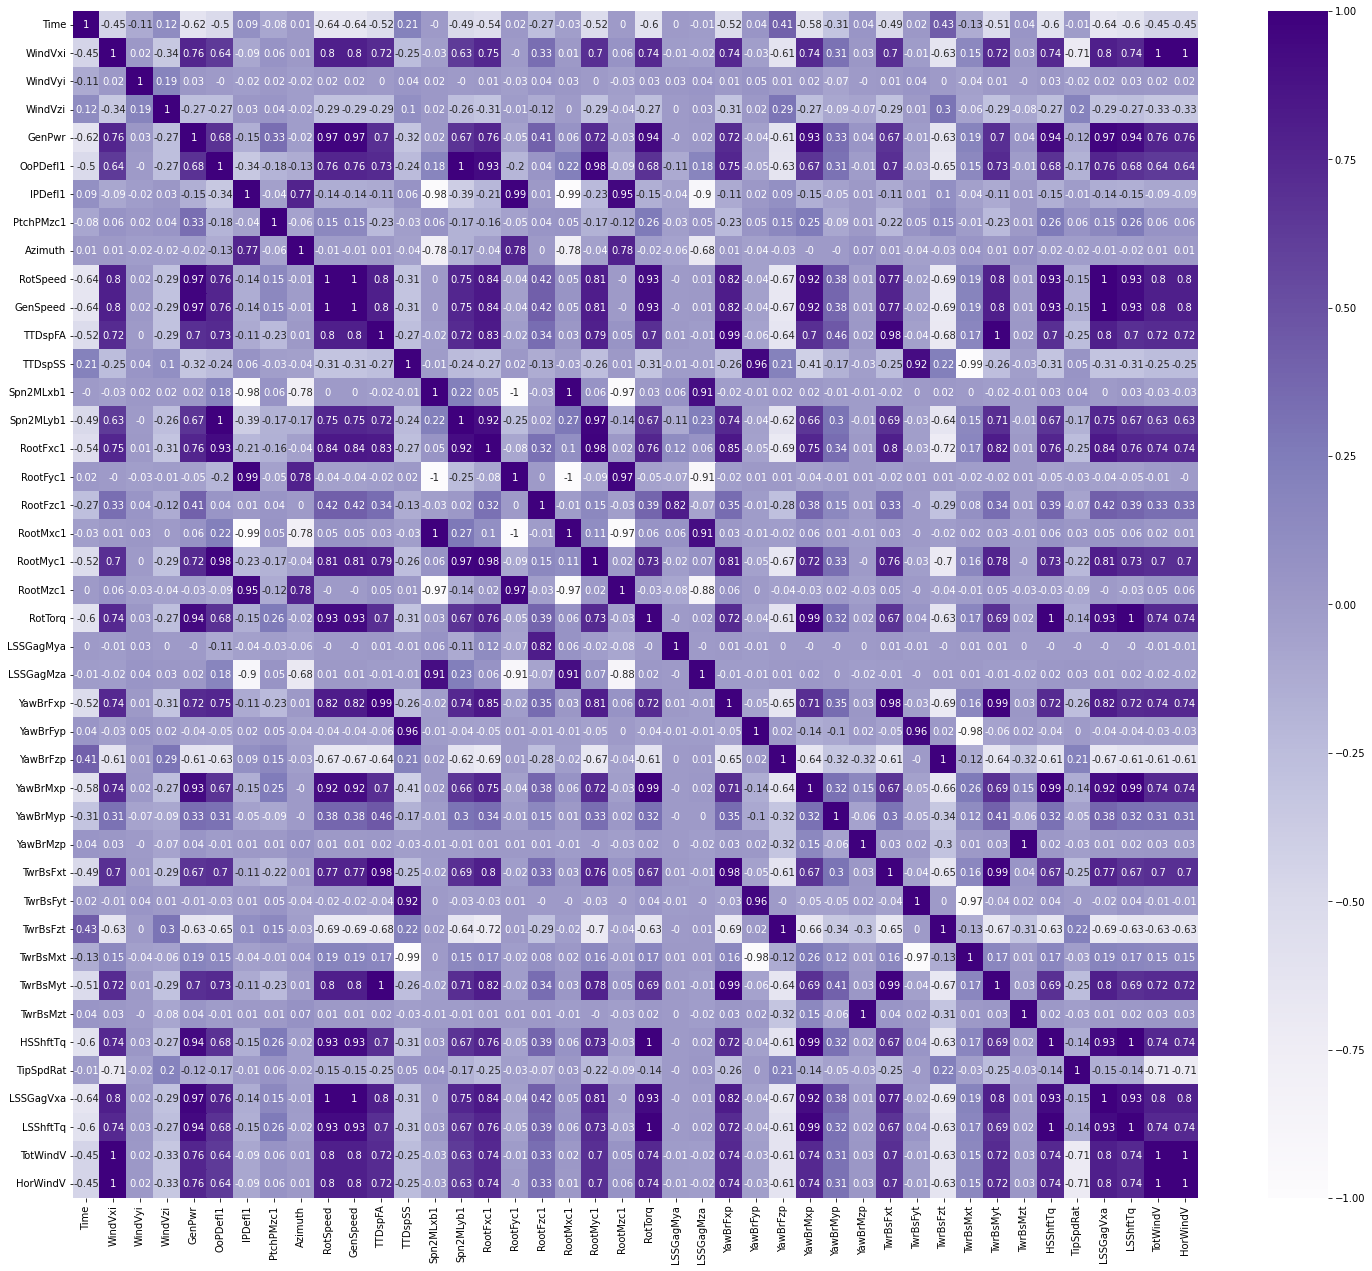

In [ ]:
correlacion = matriz_correlacion(df,'pearson',objetivo)

In [ ]:
correlacion

,TotWindV
TotWindV,1.000000
HorWindV,0.999686
WindVxi,0.998991
RotSpeed,0.796542
LSSGagVxa,0.796407
GenSpeed,0.796393
GenPwr,0.759173
RootFxc1,0.744480
HSShftTq,0.742933
LSShftTq,0.742931


In [ ]:
correlacion.head()

,TotWindV
TotWindV,1.000000
HorWindV,0.999686
WindVxi,0.998991
RotSpeed,0.796542
LSSGagVxa,0.796407


In [ ]:
correlacion.tail()

,TotWindV
WindVzi,-0.333883
Time,-0.453204
YawBrFzp,-0.605473
TwrBsFzt,-0.627775
TipSpdRat,-0.709866


### Analisis y solución de datos nulos

No hay datos nulos



In [ ]:
df.isna().sum()

Time         0
WindVxi      0
WindVyi      0
WindVzi      0
GenPwr       0
OoPDefl1     0
IPDefl1      0
PtchPMzc1    0
Azimuth      0
RotSpeed     0
GenSpeed     0
TTDspFA      0
TTDspSS      0
Spn2MLxb1    0
Spn2MLyb1    0
RootFxc1     0
RootFyc1     0
RootFzc1     0
RootMxc1     0
RootMyc1     0
RootMzc1     0
RotTorq      0
LSSGagMya    0
LSSGagMza    0
YawBrFxp     0
YawBrFyp     0
YawBrFzp     0
YawBrMxp     0
YawBrMyp     0
YawBrMzp     0
TwrBsFxt     0
TwrBsFyt     0
TwrBsFzt     0
TwrBsMxt     0
TwrBsMyt     0
TwrBsMzt     0
HSShftTq     0
TipSpdRat    0
LSSGagVxa    0
LSShftTq     0
TotWindV     0
HorWindV     0
dtype: int64

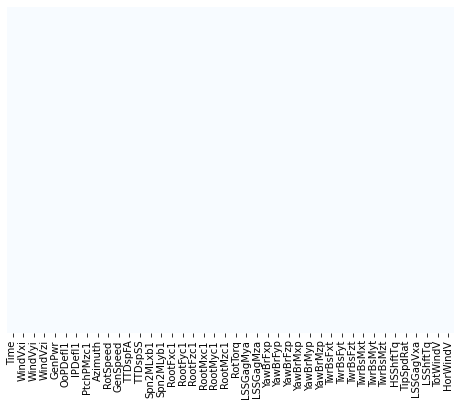

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [ ]:
print("---Nominales---")
for i in df.columns:
    if df[i].dtype == object:
        print(i,f"{df[i].dropna(axis=0).unique().shape[0]}")
print("\n---Numericos---")
for i in df.columns:
    if df[i].dtype != object:
        print(i,f"{df[i].dropna(axis=0).mean():.2f}")

---Nominales---

---Numericos---
Time 325.38
WindVxi 8.06
WindVyi -0.02
WindVzi -0.01
GenPwr 1978.92
OoPDefl1 3.27
IPDefl1 -0.32
PtchPMzc1 0.02
Azimuth 179.81
RotSpeed 9.22
GenSpeed 894.35
TTDspFA 0.21
TTDspSS -0.02
Spn2MLxb1 -37.39
Spn2MLyb1 1596.15
RootFxc1 160.91
RootFyc1 -19.43
RootFzc1 354.35
RootMxc1 645.60
RootMyc1 5822.95
RootMzc1 -0.72
RotTorq 2018.06
LSSGagMya 3.32
LSSGagMza -0.84
YawBrFxp 400.09
YawBrFyp -4.48
YawBrFzp -3467.33
YawBrMxp 2032.98
YawBrMyp 84.70
YawBrMzp -17.43
TwrBsFxt 386.59
TwrBsFyt -2.16
TwrBsFzt -6876.35
TwrBsMxt 2327.61
TwrBsMyt 34875.45
TwrBsMzt -16.09
HSShftTq 20.80
TipSpdRat 7.59
LSSGagVxa 9.22
LSShftTq 2018.06
TotWindV 8.10
HorWindV 8.08


#### DataFrame df_fill: eliminando filas con valores nulos (no usado en este problema)

In [ ]:
df_fill = df.dropna(axis=0)
df_fill.isna().sum()

Time         0
WindVxi      0
WindVyi      0
WindVzi      0
GenPwr       0
OoPDefl1     0
IPDefl1      0
PtchPMzc1    0
Azimuth      0
RotSpeed     0
GenSpeed     0
TTDspFA      0
TTDspSS      0
Spn2MLxb1    0
Spn2MLyb1    0
RootFxc1     0
RootFyc1     0
RootFzc1     0
RootMxc1     0
RootMyc1     0
RootMzc1     0
RotTorq      0
LSSGagMya    0
LSSGagMza    0
YawBrFxp     0
YawBrFyp     0
YawBrFzp     0
YawBrMxp     0
YawBrMyp     0
YawBrMzp     0
TwrBsFxt     0
TwrBsFyt     0
TwrBsFzt     0
TwrBsMxt     0
TwrBsMyt     0
TwrBsMzt     0
HSShftTq     0
TipSpdRat    0
LSSGagVxa    0
LSShftTq     0
TotWindV     0
HorWindV     0
dtype: int64

#### DataFrame df_remp: Remplazando todos los valores nulos por media/moda (no usado en este problema)

In [ ]:
# values = {
#     "color": df["color"].mode()[0],
#     "director_name": "unknown",
#     "num_critic_for_reviews": df["num_critic_for_reviews"].mean(),
#     "duration": df["duration"].mean(),
#     "director_facebook_likes": df["director_facebook_likes"].mean(),
#     "actor_1_name": "unknown", "actor_1_facebook_likes": df["actor_1_facebook_likes"].mean(),
#     "actor_2_name": "unknown", "actor_2_facebook_likes": df["actor_2_facebook_likes"].mean(),
#     "actor_3_name": "unknown", "actor_3_facebook_likes": df["actor_3_facebook_likes"].mean(),
#     "gross": df["gross"].mean(),
#     "facenumber_in_poster": df["facenumber_in_poster"].mean(),
#     "plot_keywords": "unknown",
#     "num_user_for_reviews": df["num_user_for_reviews"].mean(),
#     "language": df["language"].mode()[0],
#     "country": df["country"].mode()[0],
#     "content_rating": df["content_rating"].mode()[0],
#     "budget": df["budget"].mean(),
#     "title_year": df["title_year"].mean(),
#     "aspect_ratio": df["aspect_ratio"].mean(),
# }

# df_remp = df.fillna(value = values)
# df_remp.isna().sum()

#### Dataframe df_m: reemplazando ciertas columnas y eliminando filas restantes (no usado en este problema)
Se reemplazan solo las columnas consideradas por criterio propio, caso contrario se suprimen filas.


In [ ]:
# values = {
#     "color": df["color"].mode()[0],
#     "director_name": "unknown",
#     "num_critic_for_reviews": df["num_critic_for_reviews"].mean(),
#     "duration": df["duration"].mean(),
#     "director_facebook_likes": df["director_facebook_likes"].mean(),
#     # "actor_1_name": "unknown", "actor_1_facebook_likes": df["actor_1_facebook_likes"].mean(),
#     "actor_2_name": "unknown", "actor_2_facebook_likes": df["actor_2_facebook_likes"].mean(),
#     "actor_3_name": "unknown", "actor_3_facebook_likes": df["actor_3_facebook_likes"].mean(),
#     "gross": df["gross"].mean(),
#     "facenumber_in_poster": df["facenumber_in_poster"].mean(),
#     "plot_keywords": "unknown",
#     "num_user_for_reviews": df["num_user_for_reviews"].mean(),
#     # "language": df["language"].mode()[0],
#     # "country": df["country"].mode()[0],
#     "content_rating": df["content_rating"].mode()[0],
#     # "budget": df["budget"].mean(),
#     "title_year": df["title_year"].mean(),
#     "aspect_ratio": df["aspect_ratio"].mean(),
# }
# df_m = df.fillna(value = values).dropna(axis=0)
# df_m.isna().sum()

### Analisis de atipicos

Se puede observar la cantidad de valores atípicos en cada uno de los atributos numéricos, la mayoría de los cuales, presentan una lógica. Por ejemplo: el número de likes de los actores puede ser extremadamente elevado o muy reducido dependiendo de la fama del mismo, lo mismo sucede con la recaudación/financiación (algunas películas son de bajo presupuesto y otras superproducciones), entre otros.

In [ ]:
import numpy as np

def atipicos_columna(y, column):
    '''
        Busca y cuenta los atípicos en un vector pasado por parámetro.
        Se basa en el rango intercuartil.
    '''
    # Calcular rango intercuartil
    y_df = pd.DataFrame({'y': y})

    q25, q75 = np.percentile(y_df['y'], 25), np.percentile(y_df['y'], 75)
    iqr = q75 - q25

    # Calcule el rango de valores atípicos
    k = 1.5
    range_ir = iqr * k

    # Límites
    lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

    # Creacion de mascaras y busqueda de atípicos y no atípicos
    outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in y_df['y']]
    no_outliers_mask_ir = [False if x < lower_bound_ir or x > upper_bound_ir else True for x in y_df['y']]

    outliers = y_df['y'][outliers_mask_ir]
    no_outliers = y_df['y'][no_outliers_mask_ir]

    print("-- Columna: ",column," ->",outliers.shape[0])

def atipicos(df, inicio = 0):
    '''
        Busca y cuenta atípicos en todo el DataFrame pasado por parámetro
    '''
    print("Cantidad de atipicos: ")
    for column in df.columns[inicio:]:
        atipicos_columna(df[column].values, column)

In [ ]:
df_num =  df.select_dtypes(include =[np.number])

atipicos(df_num)

Cantidad de atipicos: 
-- Columna:  Time  -> 0
-- Columna:  WindVxi  -> 1038
-- Columna:  WindVyi  -> 244
-- Columna:  WindVzi  -> 278
-- Columna:  GenPwr  -> 1251
-- Columna:  OoPDefl1  -> 448
-- Columna:  IPDefl1  -> 0
-- Columna:  PtchPMzc1  -> 4948
-- Columna:  Azimuth  -> 0
-- Columna:  RotSpeed  -> 948
-- Columna:  GenSpeed  -> 945
-- Columna:  TTDspFA  -> 1842
-- Columna:  TTDspSS  -> 4697
-- Columna:  Spn2MLxb1  -> 0
-- Columna:  Spn2MLyb1  -> 439
-- Columna:  RootFxc1  -> 670
-- Columna:  RootFyc1  -> 0
-- Columna:  RootFzc1  -> 0
-- Columna:  RootMxc1  -> 0
-- Columna:  RootMyc1  -> 468
-- Columna:  RootMzc1  -> 0
-- Columna:  RotTorq  -> 1124
-- Columna:  LSSGagMya  -> 0
-- Columna:  LSSGagMza  -> 0
-- Columna:  YawBrFxp  -> 1347
-- Columna:  YawBrFyp  -> 4502
-- Columna:  YawBrFzp  -> 1022
-- Columna:  YawBrMxp  -> 1257
-- Columna:  YawBrMyp  -> 144
-- Columna:  YawBrMzp  -> 49
-- Columna:  TwrBsFxt  -> 1145
-- Columna:  TwrBsFyt  -> 4510
-- Columna:  TwrBsFzt  -> 1047
-- C

## Seleccion de columnas y estandarizacion

### Eliminación de columnas no informativas y conversion a numérico

En esta sección se realiza como preprocesamiento de los datos, la eliminación de columnas que no resultan de interés o con información "repetida".

In [ ]:
def matriz_correlacion(df,metodo, objetivo):
    corr_df = df.corr(method=metodo)

    # plt.figure(figsize=(25, 22))
    plt.figure(figsize=(df.shape[1]*0.6, df.shape[1]*0.52))
    sns.heatmap(round(corr_df,2), annot=True, cmap="Purples")
    plt.show()
    target_corr = corr_df[objetivo]
    return pd.DataFrame(target_corr).sort_values(objetivo, ascending=False)

In [ ]:
# from sklearn.preprocessing import normalize

def preprocess_dataframe(df):
    '''
        preprocess_dataframe:
            Funcion que elimina las columnas no informativas (columnas_eliminar)
            Convierte a dato numerico las columnas de texto, 
            en codificación numérica o su version dummy.
    '''

    # Eliminar columnas
    # columnas_eliminar = [
    #     'TwstDefl1',
    #     'TTDspTwst',
    #     'HorWindV',
    #     'WindVxi',
    #     'WindVzi',
    #     'WindVyi',
    #     'TipSpdRat'
    # ]

    columnas_dejar = [
        # objetivo,
        # 'WindVxi','WindVyi','WindVzi',
        'GenPwr',
        'GenSpeed',
        'Time',
        # 'OoPDefl1',
        # 'RotTorq',
        # 'GenTq',
        'PtchPMzc1',
        # 'YawBrMyp'
    ]
    columnas_eliminar = df.columns.drop(columnas_dejar+objetivo)


    df_aux = df.drop(columnas_eliminar, axis=1)

    return df_aux

In [ ]:
df_fill = preprocess_dataframe(df3)

Análisis de la matriz de correlación con el dataset reducido

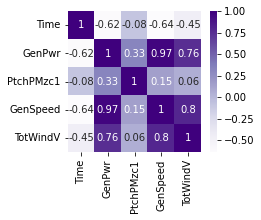

In [ ]:
correlacion = matriz_correlacion(df_fill,'pearson',objetivo)

### Estandarización de los valores

In [ ]:
#@title Estandarización de valores en entrenamiento o testeo
entrenamiento = True #@param {type:"boolean"}

def estandarizacion_entrenamiento(x):
    x_mean= x.mean()
    x_std= x.std()
    
    x = (x-x_mean)/x_std
    return x,x_mean,x_std

def estandarizacion_testeo(x,x_mean,x_std):    
    x = (x-x_mean)/x_std
    return x

df_fill_dr = pd.DataFrame()
time = ['Time']

if entrenamiento:
    means = dict.fromkeys(df_fill.columns.drop(time), None)
    stds = dict.fromkeys(df_fill.columns.drop(time), None)

    print("Aplicando estandarizacion de entrenamiento...")
    for col in df_fill.columns:
        if not col in time:
            df_fill_dr[col], mean, std = estandarizacion_entrenamiento(df_fill[col])
            means[col] = mean
            stds[col] = std
        else:
            df_fill_dr[col] = df_fill[col]
    print('Medias y desviaciones obtenidas:')
    print(means)
    print(stds)
if entrenamiento == False:
    print("Aplicando estandarizacion de testeo...")
    for col in df_fill.columns:
        if not col in time:
            df_fill_dr[col] = estandarizacion_testeo(df_fill[col], means[col], stds[col])
        else:
            df_fill_dr[col] = df_fill[col]

Aplicando estandarizacion de entrenamiento...
Medias y desviaciones obtenidas:
{'GenPwr': 3861.526247840277, 'PtchPMzc1': 6.762216666526322, 'GenSpeed': 1040.0521585237086, 'TotWindV': 12.747153544346329}
{'GenPwr': 1845.1325680644654, 'PtchPMzc1': 6.646186543876076, 'GenSpeed': 149.9230205245963, 'TotWindV': 4.709301669878437}


In [ ]:
df_fill_dr = df_fill.copy()

## Separación datos de entrenamiento y validación

In [ ]:
df_fill_dr.columns

Index(['Time', 'GenPwr', 'PtchPMzc1', 'GenSpeed', 'TotWindV'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

def dataset_split(df, target_name, porcentaje_entrenamiento = 50, porcentaje_testeo = 50):
    '''
        dataset_split
            Divide un dataset (df) en entrenamiento y test segun porcentajes 
            pasados por parámetros
    '''
    total = df.shape[0]
    test_size = porcentaje_testeo/100
    valores = df.drop(target_name, axis=1).values
    target = df[target_name]#.values.ravel()
    x_train, x_test, y_train, y_test = train_test_split(
        valores, target, 
        test_size=test_size, 
        shuffle=True,
        # stratify=target,
    )

    # x_train = valores[:30315]
    # x_test = valores[30315:]
    # y_train = target[:30315]
    # y_test = target[30315:]

    tiempo_train = x_train[:,0]
    tiempo_test = x_test[:,0]

    x_train = x_train[:,1:]
    x_test = x_test[:,1:]

    print(f"Datos de entrenamiento: {y_train.shape[0]} ({porcentaje_entrenamiento}%)")
    print(f"Datos de testeo: {y_test.shape[0]} ({porcentaje_testeo}%)")

    return x_train, x_test, y_train, y_test, tiempo_train, tiempo_test

In [ ]:
x_train, x_test, y_train, y_test, tiempo_train, tiempo_test = dataset_split(df_fill_dr, objetivo, 70, 30)

Datos de entrenamiento: 28025 (70%)
Datos de testeo: 12011 (30%)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#@title Estandarización de valores en entrenamiento o testeo
entrenamiento = True #@param {type:"boolean"}

if entrenamiento:
    escalador = MinMaxScaler().fit(x_train)
x_train = escalador.transform(x_train)
x_test = escalador.transform(x_test)

## Algoritmos de regresión

### Entrenamiento de modelos

En esta sección se crean diversos modelos de regresión con cada una de las variantes de dataset (df_fill, df_remp, df_m) con el fin de determinar posteriormente cuál es el mejor regresor y el grado de influencia de las consideraciones tomadas respecto de los valores nulos.

*Aclaración:* se han probado una gran cantidad de modelos (debido a que resultaron de interés las diferencias de los mismos), además de la utilización de GridSearchCV para la determinación de los mejores hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

models_df_fill = []
models_df_remp = []
models_df_m = []

#### Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

def regresion_lineal(x_train, x_test, y_train, y_test):
    reg = LinearRegression()
    
    reg.fit(x_train, y_train)
    acc_train = reg.score(x_train,y_train)
    acc_test = reg.score(x_test,y_test)
    
    print("Model: ", reg)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": reg, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_lineal(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  LinearRegression()
	Accuracy train: 0.58
	Accuracy test: 0.57


#### Regresion Lasso

In [ ]:
from sklearn.linear_model import LassoCV, MultiTaskLassoCV

def regresion_lasso(x_train, x_test, y_train, y_test): 
    lasso_cv = MultiTaskLassoCV(cv = 10, max_iter = 100000)
    lasso_cv.fit(x_train,y_train)
    
    acc_train = lasso_cv.score(x_train,y_train)
    acc_test = lasso_cv.score(x_test,y_test)
    
    print("Model: ", lasso_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": lasso_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
# if y_test[0].shape == (1,):
dic_model_df_fill = regresion_lasso(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  MultiTaskLassoCV(cv=10, max_iter=100000)
	Accuracy train: 0.58
	Accuracy test: 0.57


#### Regresion Ridge

*Aclaración:* Arroja warnings en ejecución, por lo que se ha eliminado la salida de las celdas (solo a fin de no entorpecer la lectura de la notebook) pero se almacenan los resultados para su posterior análisis y comparación.

In [ ]:
from sklearn.linear_model import RidgeCV

def regresion_ridge(x_train, x_test, y_train, y_test): 
    ridge_cv = RidgeCV(cv = 10)
    ridge_cv.fit(x_train,y_train)
    
    acc_train = ridge_cv.score(x_train,y_train)
    acc_test = ridge_cv.score(x_test,y_test)

    print("Model: ", ridge_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": ridge_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_ridge(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10)
	Accuracy train: 0.58
	Accuracy test: 0.57


#### Regresion Elasticnet


In [ ]:
from sklearn.linear_model import ElasticNetCV, MultiTaskElasticNetCV

def regresion_elastic_net(x_train, x_test, y_train, y_test): 
    elastic_net_cv = MultiTaskElasticNetCV(cv = 10, max_iter = 100000)
    elastic_net_cv.fit(x_train,y_train)
    
    acc_train = elastic_net_cv.score(x_train,y_train)
    acc_test = elastic_net_cv.score(x_test,y_test)

    print(f"Accuracy train: {acc_train:.2f}")
    print(f"Accuracy test: {acc_test:.2f}")
    dic_model = {"model": elastic_net_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
# if y_test[0].shape == (1,):
dic_model_df_fill = regresion_elastic_net(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Accuracy train: 0.58
Accuracy test: 0.57


#### Regresion RANSAC


In [ ]:
from sklearn.linear_model import RANSACRegressor

def regresion_ransac(x_train, x_test, y_train, y_test): 
    ransac = RANSACRegressor()
    ransac.fit(x_train,y_train)
    
    acc_train = ransac.score(x_train,y_train)
    acc_test = ransac.score(x_test,y_test)

    print("Model: ", ransac)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": ransac, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_ransac(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  RANSACRegressor()
	Accuracy train: 0.53
	Accuracy test: 0.53


#### Regresion LARS

*Aclaración:* Arroja Warnings en ejecución dado que al realizar la Estandarización internamente algunos valores se vuelven "inestables". Se ha eliminado la salida de las celdas aunque se almacenan los resultados para su posterior comparación.

In [ ]:
from sklearn.linear_model import LarsCV

def regresion_lars(x_train, x_test, y_train, y_test): 
    lars_cv = LarsCV(cv = 10, max_iter = 100000)
    lars_cv.fit(x_train,y_train)
    
    acc_train = lars_cv.score(x_train,y_train)
    acc_test = lars_cv.score(x_test,y_test)
    
    print("Model: ", lars_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": lars_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
# if y_test[0].shape == (1,):
dic_model_df_fill = regresion_lars(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  LarsCV(cv=10, max_iter=100000)
	Accuracy train: 0.58
	Accuracy test: 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def regresion_arbol_decision(x_train, x_test, y_train, y_test): 
    dt = DecisionTreeRegressor(random_state=1)
    # dt_params = {'max_depth': np.arange(1,15), 'min_samples_leaf': np.arange(2,15)}
    # dt_params = {'max_depth': np.arange(1,10), 'min_samples_leaf': np.arange(2,10)}
    dt_params = {'max_depth': np.arange(1,25), 'min_samples_leaf': np.arange(2,10)}

    GS_dt = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
    GS_dt.fit(x_train, y_train)
    dt = GS_dt.best_estimator_
    acc_train = dt.score(x_train, y_train)
    acc_test = dt.score(x_test, y_test)
    
    print("Model: ", dt)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": dt, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_arbol_decision(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  DecisionTreeRegressor(max_depth=24, min_samples_leaf=4, random_state=1)
	Accuracy train: 0.94
	Accuracy test: 0.88


#### Bosques Aleatorios

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def regresion_bosque_aleatorio(x_train, x_test, y_train, y_test): 
    rf= RandomForestRegressor(random_state=1)
    # rf_params={'n_estimators': np.arange(1,50)}
    rf_params={'n_estimators': np.arange(1,25)}

    rf_grid=GridSearchCV(estimator= rf, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
    rf_grid.fit(x_train, y_train)
    rf = rf_grid.best_estimator_
    acc_train = rf.score(x_train, y_train)
    acc_test = rf.score(x_test, y_test)
    
    print("Model: ", rf)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": rf, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_bosque_aleatorio(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Model:  RandomForestRegressor(n_estimators=24, random_state=1)
	Accuracy train: 0.97
	Accuracy test: 0.89


#### Perceptron multicapa

In [ ]:
from sklearn.neural_network import MLPRegressor

def regresion_mlp(x_train, x_test, y_train, y_test): 
    mlp = MLPRegressor(solver='adam', activation='tanh',max_iter=5000).fit(x_train, y_train)
    acc_train = mlp.score(x_test, y_test)
    acc_test = mlp.score(x_test, y_test)

    print("Model: ", mlp)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": mlp, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_mlp(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:  MLPRegressor(activation='tanh', max_iter=5000)
	Accuracy train: 0.57
	Accuracy test: 0.57


#### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def regresion_vecinos_cercanos(x_train, x_test, y_train, y_test): 
    knn = KNeighborsRegressor()
    knn_params = {'n_neighbors': np.arange(3,int(np.sqrt(x_train.shape[0]))//2), 'weights':['distance']} # 'uniform',

    knn_grid=GridSearchCV(estimator=knn, param_grid=knn_params, cv=3, scoring='neg_mean_squared_error')
    knn_grid.fit(x_train, y_train)
    knn = knn_grid.best_estimator_
    acc_train = knn.score(x_train, y_train)
    acc_test = knn.score(x_test, y_test)
    
    print("Model: ", knn)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": knn, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
dic_model_df_fill = regresion_vecinos_cercanos(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Model:  KNeighborsRegressor(weights='distance')
	Accuracy train: 1.00
	Accuracy test: 0.88


### Comparacion de modelos y conclusiones

Se realiza una comparación de los modelos obtenidos por cada uno de los conjuntos de datos trabajados.

In [ ]:
df_results_models = pd.DataFrame(models_df_fill)
df_results_models['model'] = df_results_models['model'].apply(lambda x: x.__class__.__name__)
df_results_models['acc_train'] = df_results_models['acc_train'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models['acc_test'] = df_results_models['acc_test'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models.sort_values("acc_test", ascending=False)

,model,acc_train,acc_test
7,RandomForestRegressor,96.90,88.67
6,DecisionTreeRegressor,94.37,87.88
9,KNeighborsRegressor,99.87,87.88
0,LinearRegression,57.99,57.31
1,MultiTaskLassoCV,57.99,57.31
2,RidgeCV,57.99,57.31
3,MultiTaskElasticNetCV,57.99,57.31
5,LarsCV,57.99,57.31
8,MLPRegressor,56.72,56.72
4,RANSACRegressor,53.14,52.96


In [ ]:
list(df_fill_dr.columns)

['Time', 'GenPwr', 'PtchPMzc1', 'GenSpeed', 'TotWindV']

# Graficos

In [ ]:
y_test = y_test.values

AttributeError: ignored

In [ ]:
orden = np.argsort(tiempo_test)
x_test_ord = x_test[orden]
y_test_ord = y_test[orden]
tiempo_test_ord = tiempo_test[orden]

In [ ]:
y_test_ord_df = pd.DataFrame(y_test_ord, columns=objetivo)
y_test_ord_df.head()

,TotWindV
0,9.243
1,9.018
2,9.130
3,9.279
4,9.294


In [ ]:
# Ejemplo con uno de los datasets para mostrar estructura de datos resultados_df comparable con y_test_ord_df
resultados = models_df_fill[0]['model'].predict(x_test_ord)
resultados_df = pd.DataFrame(resultados, columns=objetivo)
resultados_df.head()

,TotWindV
0,14.930622
1,14.566626
2,14.453393
3,14.257075
4,14.177989


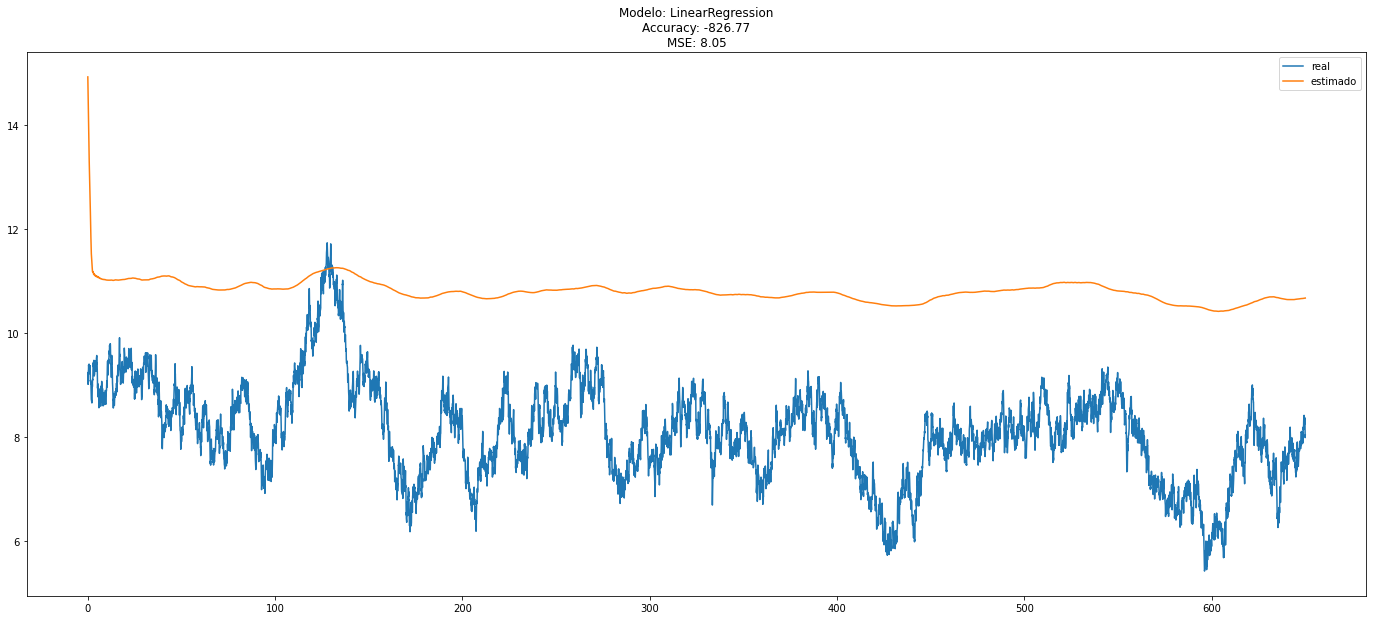

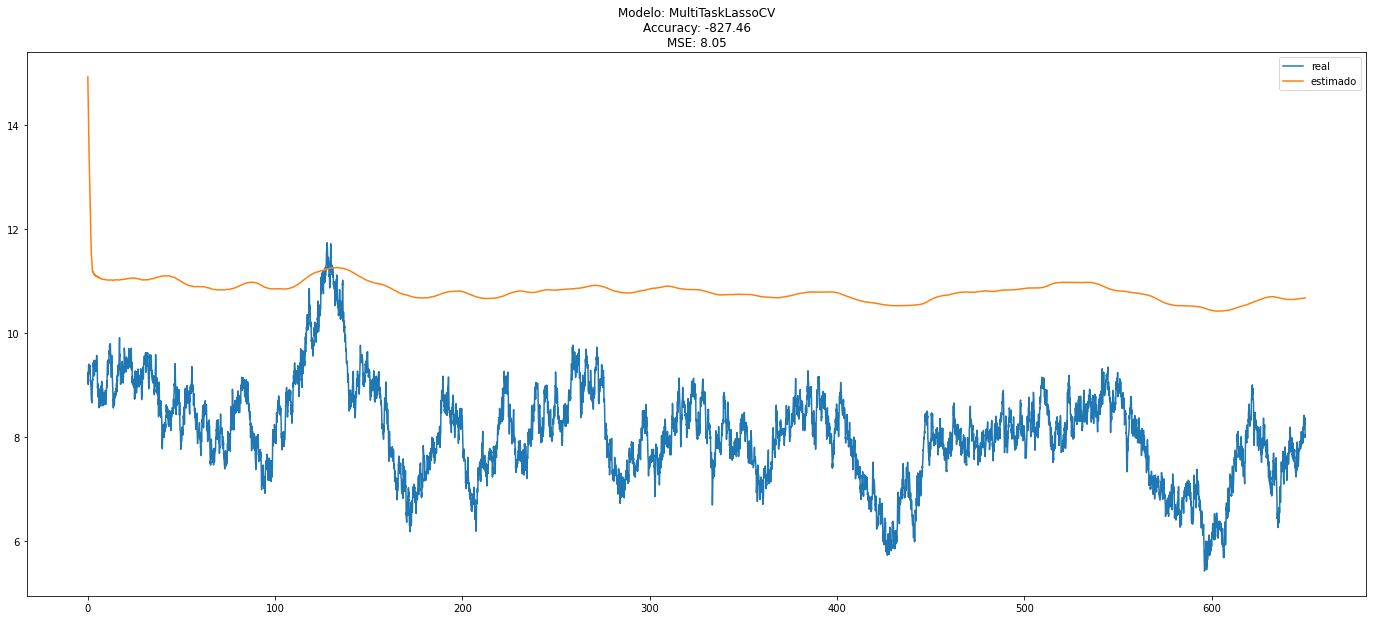

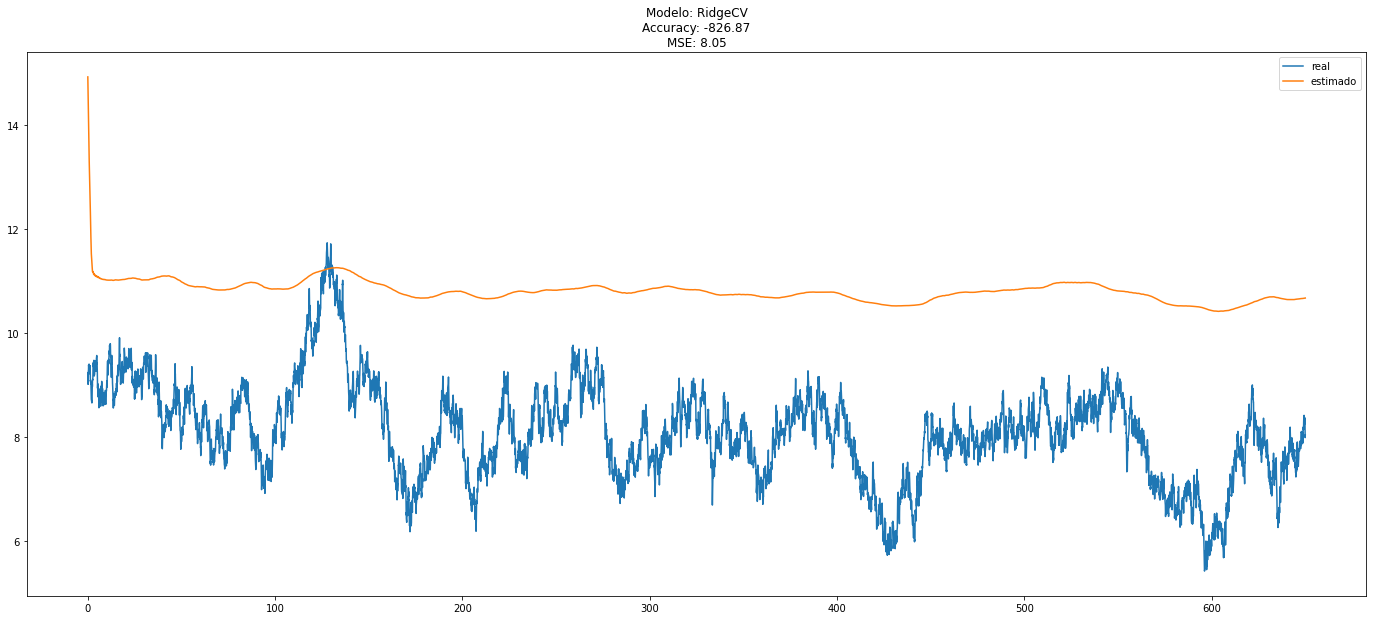

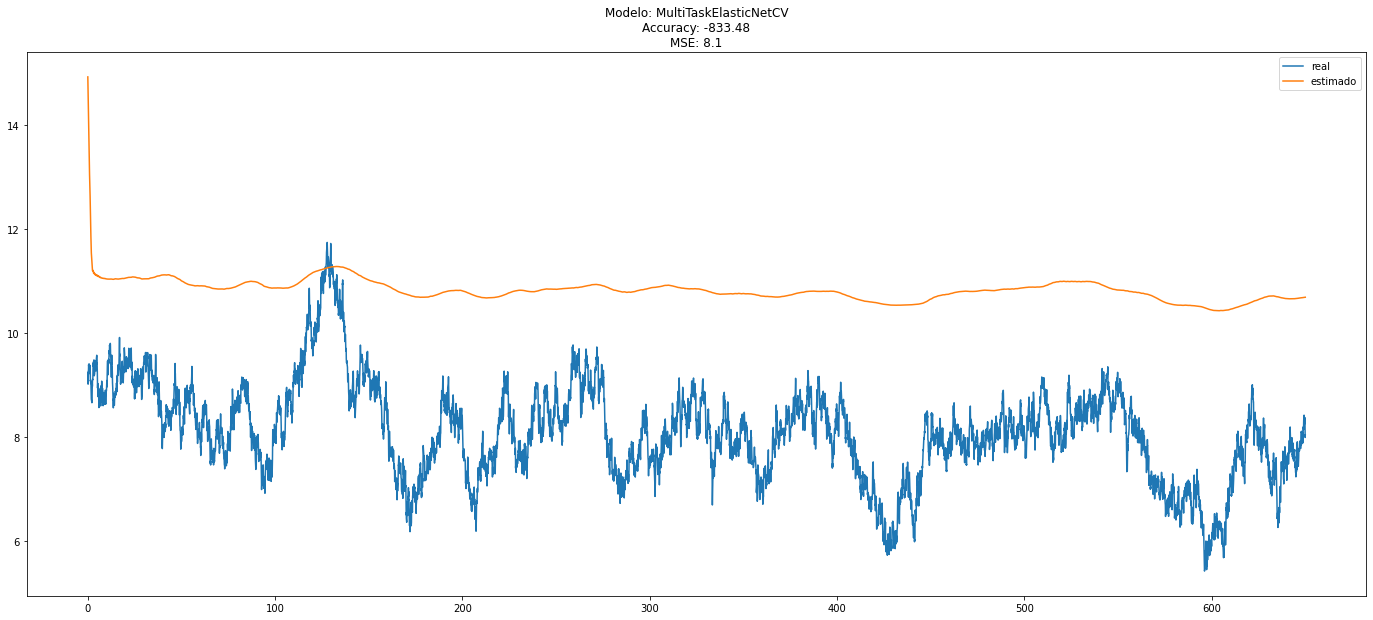

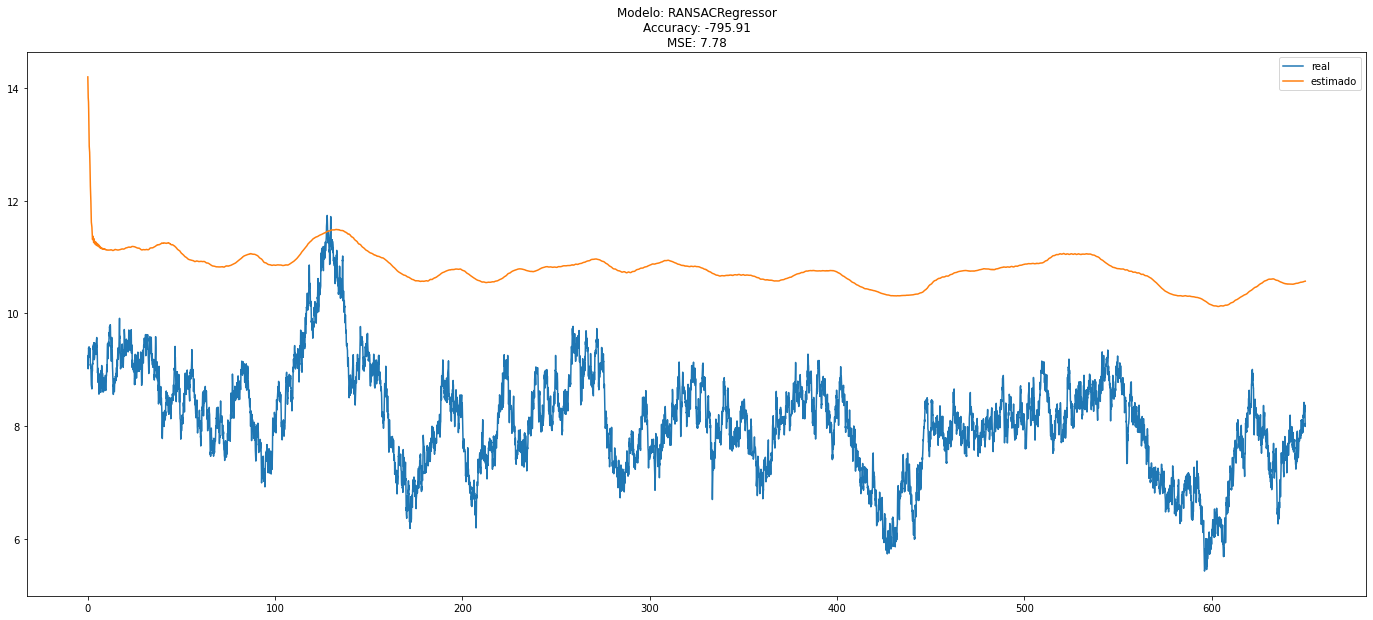

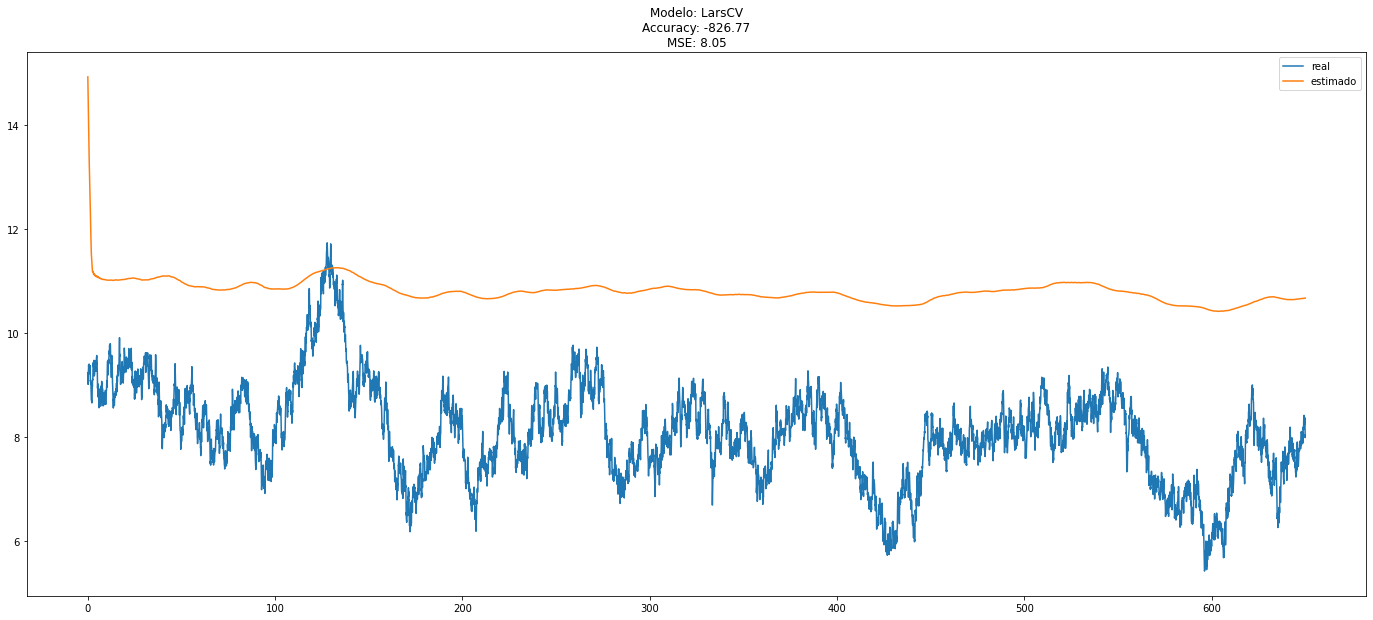

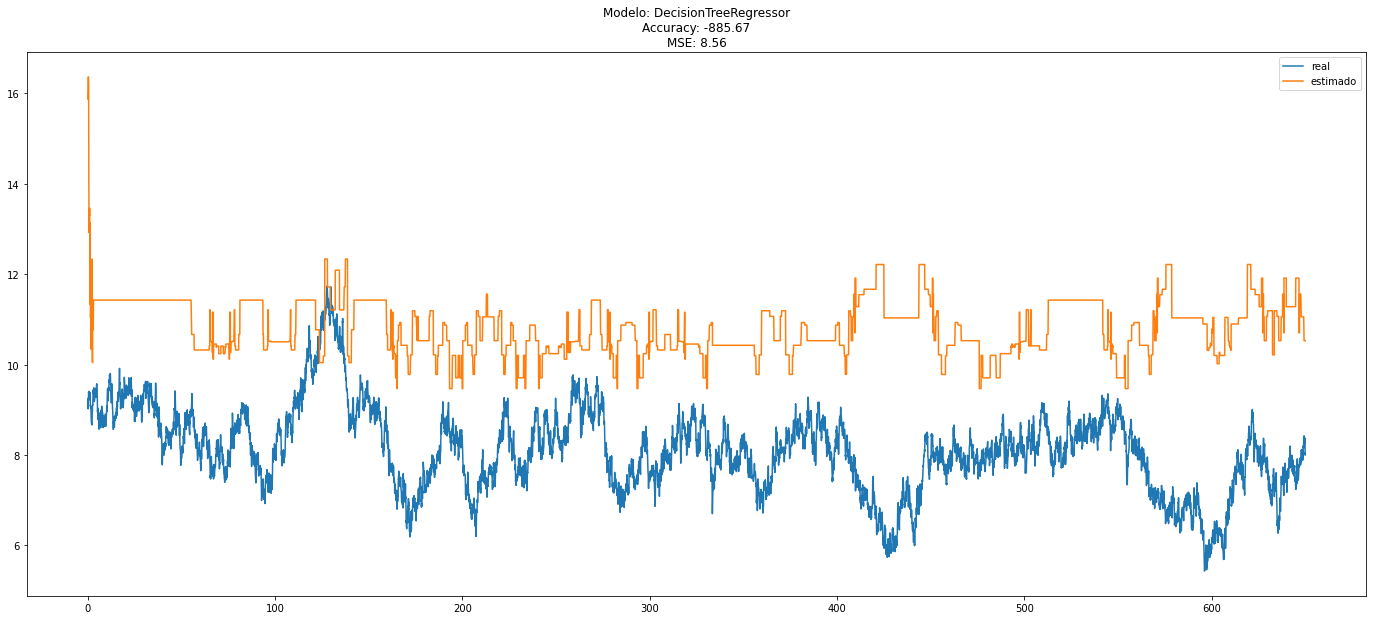

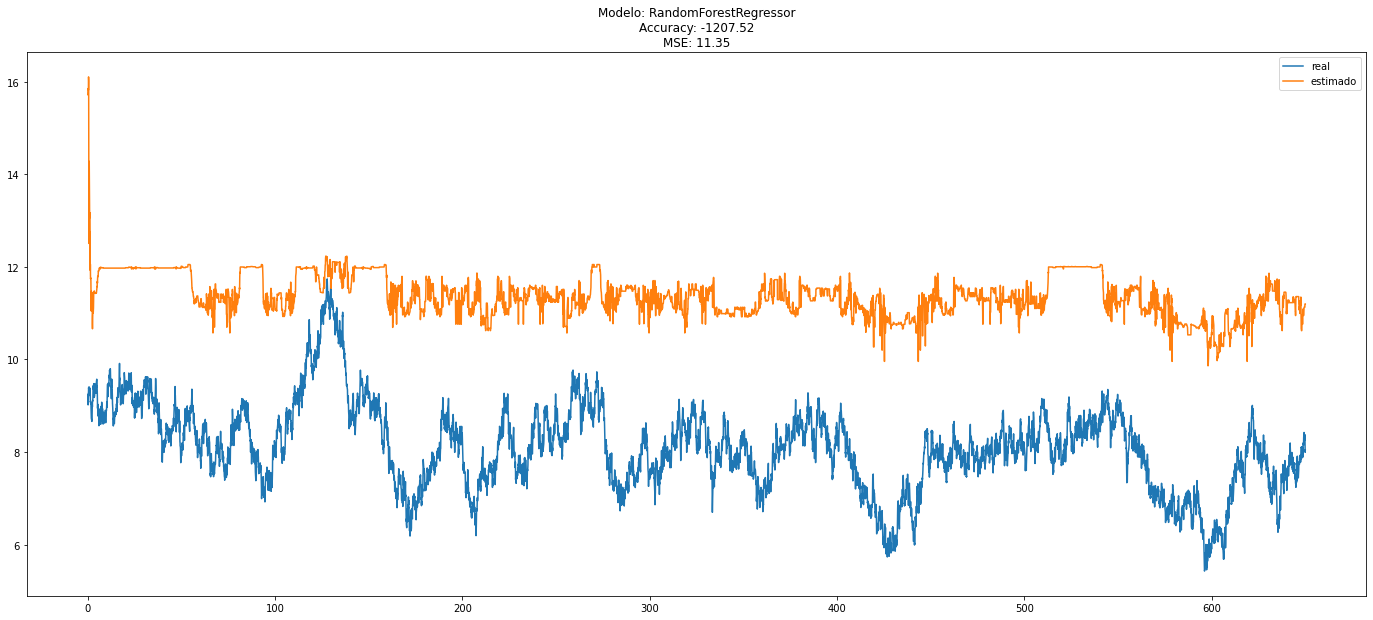

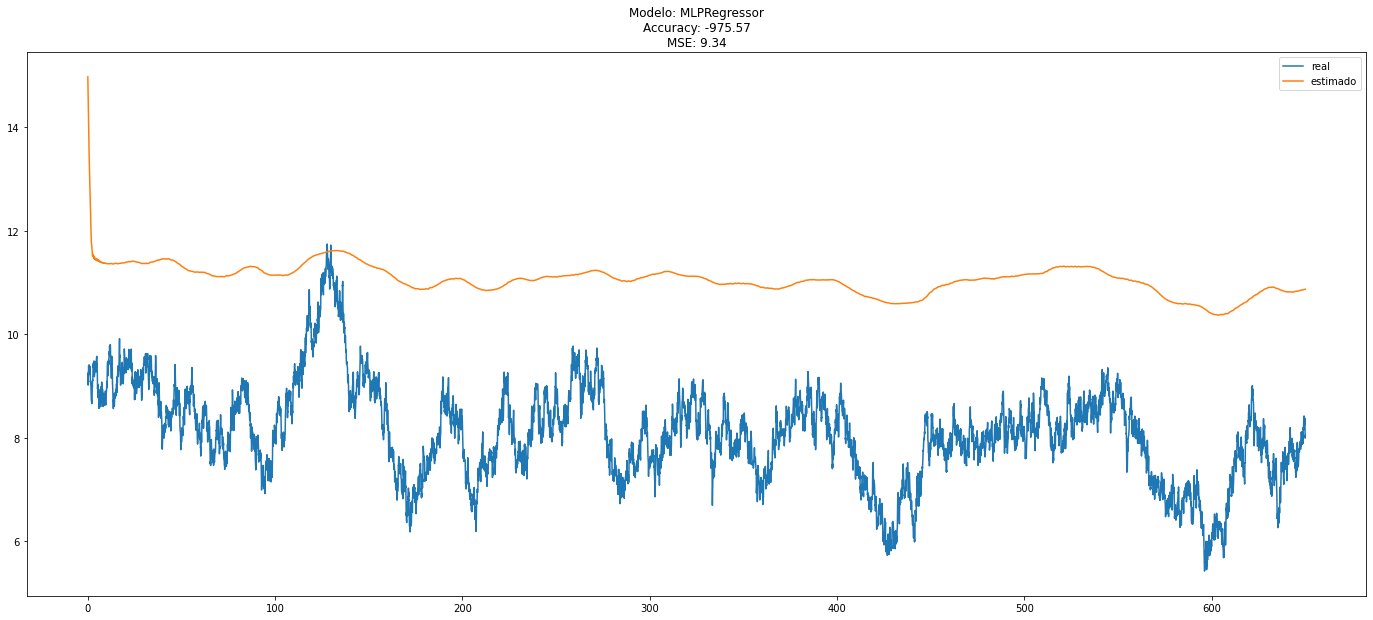

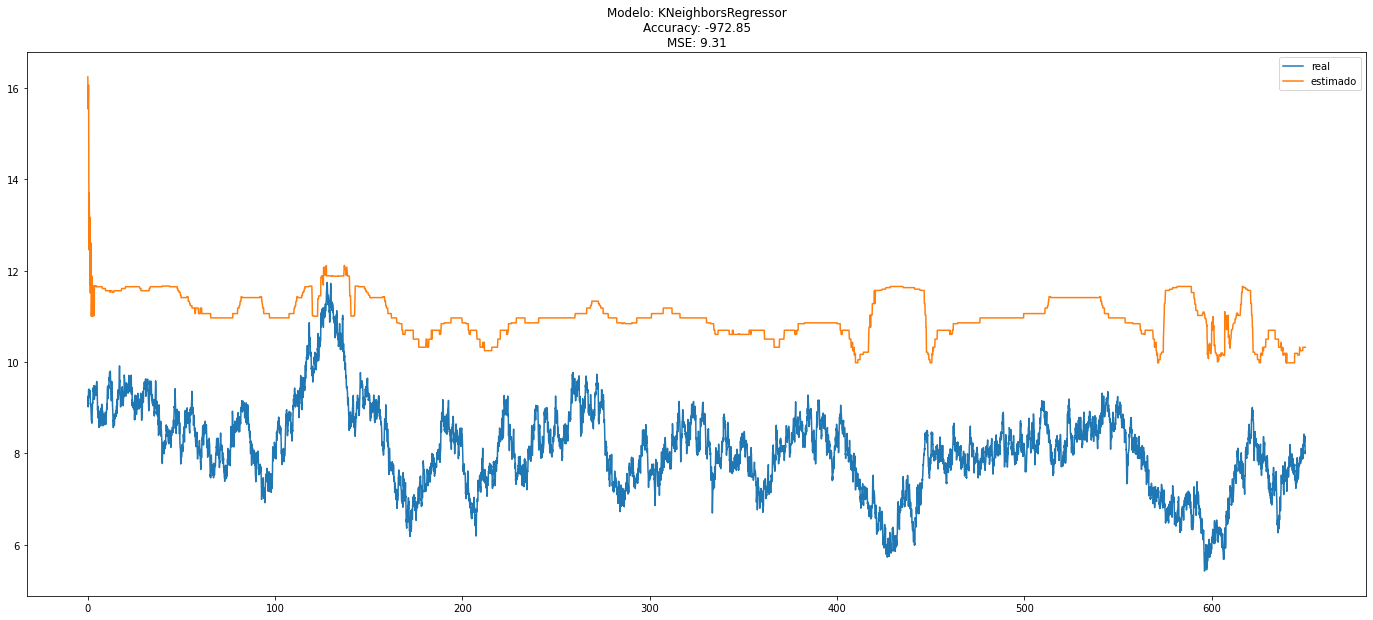

In [ ]:
#@title TotWindV
for model in models_df_fill:
    resultados = model['model'].predict(x_test_ord)
    resultados_df = pd.DataFrame(resultados, columns=objetivo)
    plt.figure(figsize=(24,10))
    plt.plot(tiempo_test_ord, y_test_ord_df['TotWindV'], label='real')
    plt.plot(tiempo_test_ord, resultados_df['TotWindV'], label='estimado')
    plt.legend()
    acc = round(model['model'].score(x_test,y_test)*100,2)
    mse = round(mean_squared_error(model['model'].predict(x_test),y_test),2)
    plt.title('Modelo: '+model['model'].__class__.__name__+'\nAccuracy: '+str(acc)+'\nMSE: '+str(mse))
    plt.show()

    print('\n')

In [ ]:
from sklearn.metrics import mean_squared_error

#@title Tres direcciones
for model in models_df_fill:
    resultados = model['model'].predict(x_test_ord)
    resultados_df = pd.DataFrame(resultados, columns=objetivo)

    plt.figure(figsize=(24,10))

    plt.subplot(3,1,1)
    plt.plot(y_test_ord_df['WindVxi'], label='real')
    plt.plot(resultados_df['WindVxi'], label='estimado')
    plt.title('WindVxi')
    plt.legend()

    plt.subplot(3,1,2)
    plt.plot(y_test_ord_df['WindVyi'], label='real')
    plt.plot(resultados_df['WindVyi'], label='estimado')
    plt.title('WindVyi')
    plt.legend()

    plt.subplot(3,1,3)
    plt.plot(y_test_ord_df['WindVzi'], label='real')
    plt.plot(resultados_df['WindVzi'], label='estimado')
    plt.title('WindVzi')
    plt.legend()

    # plt.suptitle('Modelo: '+model['model'].__class__.__name__+' - Accuracy: '+str(round(model['model'].score(x_test,y_test)*100,2)))
    plt.suptitle('Modelo: '+model['model'].__class__.__name__+' - MSE: '+str(round(mean_squared_error(model['model'].predict(x_test),y_test),2)))
    plt.show()

    print('\n')

## Conclusiones



### Estimacion TotWindV

Columnas: `['GenPwr', 'PtchPMzc1', 'GenSpeed', 'TotWindV']`

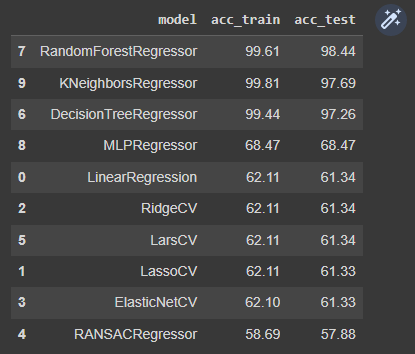

### Estimacion WindVxi

Columnas: `['WindVxi', 'GenPwr', 'PtchPMzc1', 'GenSpeed']`

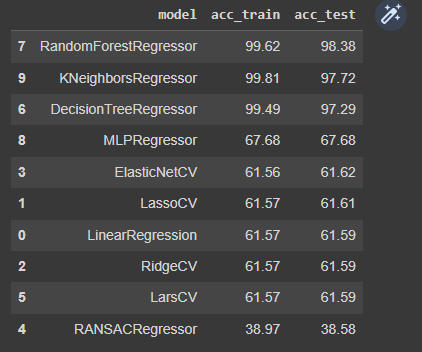

### Estimacion WindVyi

Columnas: `['WindVyi', 'GenPwr', 'PtchPMzc1', 'GenSpeed']`

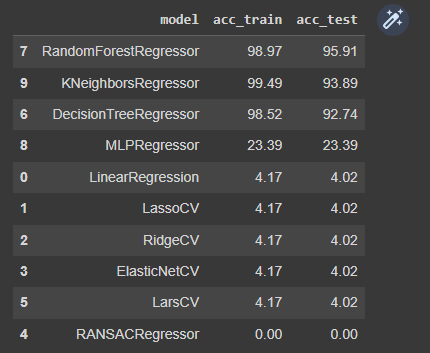

### Estimacion WindVzi

Columnas: `['WindVzi', 'GenPwr', 'PtchPMzc1', 'GenSpeed']`

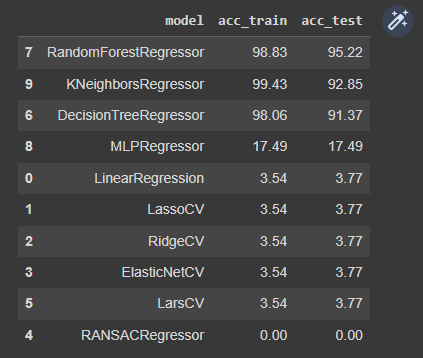

### Estimacion WindVxi, WindVyi y WindVzi a la vez

Columnas: `['WindVxi', 'WindVyi', 'WindVzi', 'GenPwr', 'PtchPMzc1', 'GenSpeed']`

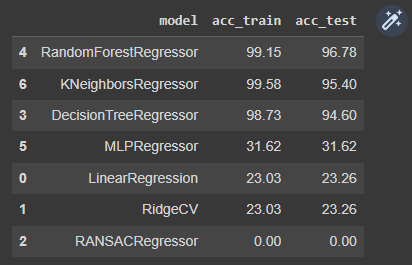

### Estimación de OoPDefl1 y IPDefl1 a la vez

Columnas: `['GenPwr', 'OoPDefl1', 'IPDefl1', 'PtchPMzc1', 'GenSpeed']`

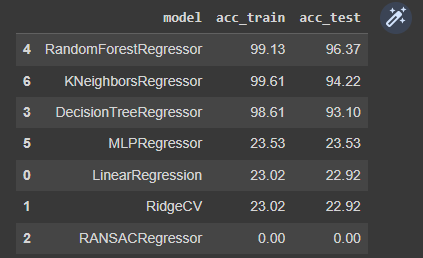

### Estimación de OoPDefl1, IPDefl1, WindVxi, WindVyi y WindVzi a la vez

Columnas: `['WindVxi',
 'WindVyi',
 'WindVzi',
 'GenPwr',
 'OoPDefl1',
 'IPDefl1',
 'PtchPMzc1',
 'GenSpeed']`

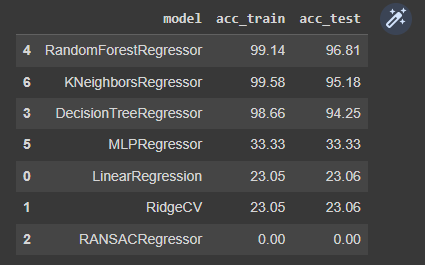